# Riddler Classic

After a long night of frivolous quackery, two delirious ducks are having a difficult time finding each other in their pond. The pond happens to contain a 3×3 grid of rocks.

Every minute, each duck randomly swims, independently of the other duck, from one rock to a neighboring rock in the 3×3 grid — up, down, left or right, but not diagonally. So if a duck is at the middle rock, it will next swim to one of the four side rocks with probability 1/4. From a side rock, it will swim to one of the two adjacent corner rocks or back to the middle rock, each with probability 1/3. And from a corner rock, it will swim to one of the two adjacent side rocks with probability 1/2.

If the ducks both start at the middle rock, then on average, how long will it take until they’re at the same rock again? (Of course, there’s a 1/4 chance that they’ll swim in the same direction after the first minute, in which case it would only take one minute for them to be at the same rock again. But it could take much longer, if they happen to keep missing each other.)

Extra credit: What if there are three or more ducks? If they all start in the middle rock, on average, how long will it take until they are all at the same rock again?

4.199999999737615


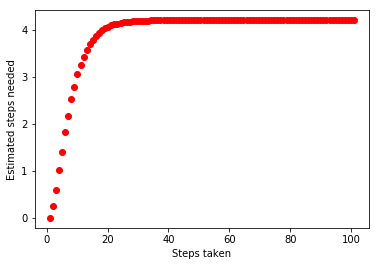

In [37]:
import numpy as np
import matplotlib.pyplot as plt


"""Throughout the solution I will refer to the 4 corners of the grid as the Corners, 
the middle of each edge as edge and the center as the center."""



#OverlapMatrix
"""This matrix describes the connectivity of the grid. It has 9 rows and 9 columns. Each represents a positoin in the 
3 x 3 grid.
The element M_ij describes the probability of going from pos i to position j in 1 step"""

p=1/2.0
q= 1/3.0
r=1/4.0

M=np.array([[0,p,0,p,0,0,0,0,0],
   [q,0,q,0,q,0,0,0,0],
   [0,p,0,0,0,p,0,0,0],
   [q,0,0,0,q,0,q,0,0],
   [0,r,0,r,0,r,0,r,0],
   [0,0,q,0,q,0,0,0,q],
   [0,0,0,p,0,0,0,p,0],
   [0,0,0,0,q,0,q,0,q],
   [0,0,0,0,0,p,0,p,0]])

MTr=M.T # transpose of M

S =np.array([[0],[0],[0],[0],[1],[0],[0],[0],[0]]) # This is the initial position probability distribution for each duck.

def P2(N):
    """Probability of two ducks meeting exactly at the Nth step and never before
    This is the crux of the matter. After 1 step the ducks are in the edge positions. 
    The probability of each duck being in each of the edge positions is 1/4. They are both in the
    same position with probability 1/16 but there are 4 equivalent edges so the net probability is 4*1/16 = 1/4. 
    """

    
    
    if N % 2==0:
        return (8/36)*(1-(9/36))**(N/2)*(1-(8/36))**((N/2)-1)
    else:
        return (9/36)*(1-(9/36))**((N-1)/2)*(1-(8/36))**((N-1)/2)
    
Avg_steps=0
Ylist=[]
Xlist= np.linspace(1,101,100)
for i in range (100):
    Avg_steps += i*P2(i)
    Ylist.append(Avg_steps)

print(Avg_steps)


plt.plot(Xlist,Ylist,'or')
plt.xlabel("Steps taken")
plt.ylabel("Estimated steps needed")
plt.show()

In [6]:
S.shape

(9, 1)

In [7]:
M.shape

(9, 9)

In [16]:
S_new = np.matmul(MTr,S)
print(S_new)

[[0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]]


In [17]:
S_new = np.matmul(MTr,S_new)
print(S_new)

[[0.16666667]
 [0.        ]
 [0.16666667]
 [0.        ]
 [0.33333333]
 [0.        ]
 [0.16666667]
 [0.        ]
 [0.16666667]]


In [18]:
S_new = np.matmul(MTr,S_new)
print(S_new)

[[0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]]


In [24]:
P(1)

0.25

In [25]:
P(2)

0.16666666666666666

In [28]:
Xlist

array([1.])